In [1]:
import os
import pickle
import numpy as np
import tensorflow.keras as keras
data_dir = "prepped_data/train/"

/home/hastings/anaconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hastings/anaconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hastings/anaconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hastings/anaconda3/envs/styl

In [2]:
names = os.listdir(data_dir)


In [3]:
classes.shape

NameError: name 'classes' is not defined

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', 
                 input_shape=(128, 128, 4)
                 
                ))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))              
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(12))

model.summary()

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.0002))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
__________

In [6]:
name = names[0]

def load_dataset(name):
    with open(name, "rb") as f:
        dataset = pickle.load(f)

    data = []
    classes = []
    for elem in dataset:
        data_entry = np.array(np.stack(elem["data"], axis=-1), dtype=np.float32)
        data_entry += 1000
        data_entry /= 2000
        data.append(data_entry)

        class_entry = elem["classes"]
        class_entry = np.concatenate([class_entry[0] / 4, class_entry[1].flatten() * 40])
        class_entry[[3, 7, 11]] -= 40
        classes.append(class_entry)
    data = np.array(data)
    classes = np.array(classes)
    return data, classes


In [ ]:
tdata, tclasses = load_dataset("prepped_data/test/Pancreas_6pregenerated.pickle")
import random
for _ in range(20):
    print("===========")
    random.shuffle(names)
    for name in names:
        print(name)
        data, classes = load_dataset(data_dir + name)
        loss_curve = model.fit(data, 
              classes,
              batch_size=256,
              epochs=1,
              verbose=1,
              validation_data=(tdata[:256], tclasses[:256]))

Pancreas_65pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 8s 933us/step - loss: 1.8415 - val_loss: 1.7779
Pancreas_44pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 505us/step - loss: 1.5720 - val_loss: 1.5325
Pancreas_36pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 503us/step - loss: 1.4091 - val_loss: 1.3753
Pancreas_60pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 503us/step - loss: 1.3642 - val_loss: 1.3221
Pancreas_74pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 504us/step - loss: 1.2781 - val_loss: 1.1889
Pancreas_20pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/81

8192/8192 [==============================] - 4s 508us/step - loss: 0.8160 - val_loss: 0.8368
Pancreas_39pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 508us/step - loss: 0.8929 - val_loss: 0.8338
Pancreas_79pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 508us/step - loss: 0.9051 - val_loss: 0.8029
Pancreas_22pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 508us/step - loss: 0.8414 - val_loss: 0.8118
Pancreas_25pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 509us/step - loss: 0.8742 - val_loss: 0.7835
Pancreas_56pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 508us/step - loss: 0.8845 - val_loss: 0.7969
Pa

8192/8192 [==============================] - 4s 508us/step - loss: 0.8142 - val_loss: 0.7224
Pancreas_52pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 508us/step - loss: 0.6641 - val_loss: 0.7586
Pancreas_72pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 509us/step - loss: 0.6854 - val_loss: 0.7490
Pancreas_67pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 508us/step - loss: 0.7188 - val_loss: 0.7060
Pancreas_64pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 509us/step - loss: 0.7510 - val_loss: 0.7252
Pancreas_28pregenerated.pickle
Train on 8192 samples, validate on 256 samples
Epoch 1/1
8192/8192 [==============================] - 4s 508us/step - loss: 0.8300 - val_loss: 0.7192
Pa

In [16]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.0002))

In [47]:
rclasses = model.predict(tdata)

In [48]:
data.size

536870912

In [49]:
tclasses[0]

array([ 0.3781468 ,  5.0856459 ,  1.09619544, -0.0160148 ,  0.76078398,
        0.83793504, -0.74443662, -0.01456173, -0.78137099, -0.85249136,
        0.76546342, -0.01641181])

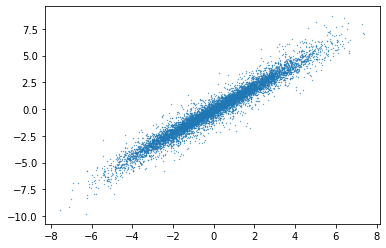

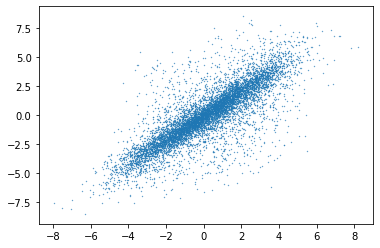

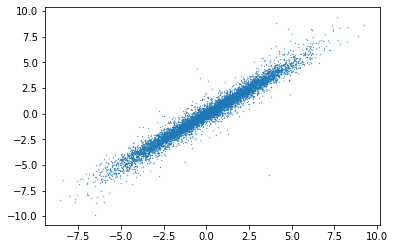

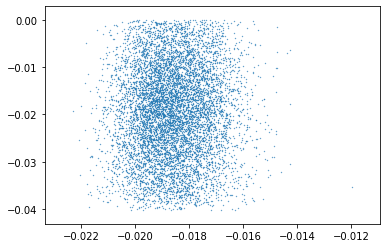

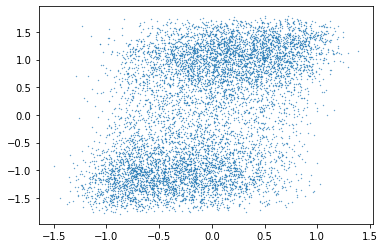

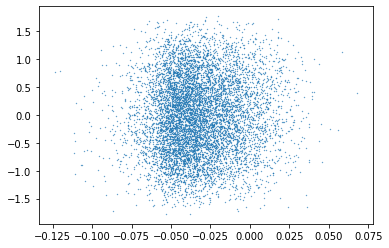

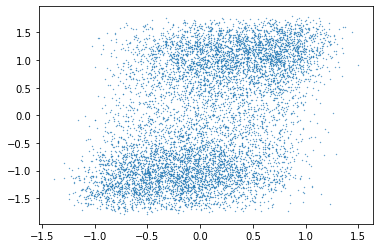

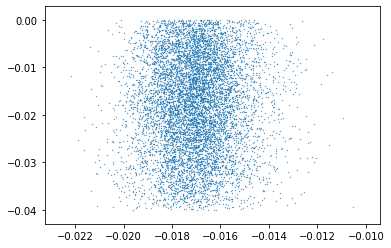

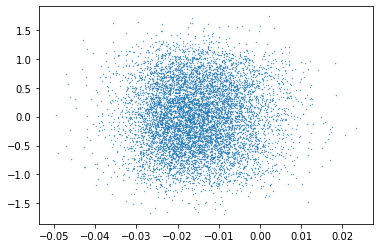

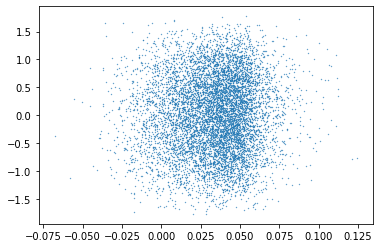

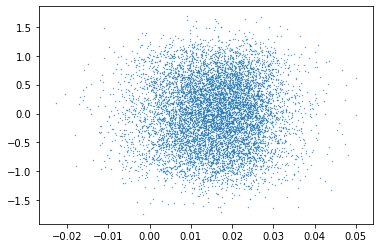

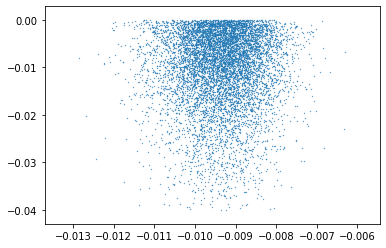

In [50]:
import matplotlib.pyplot as plt
for j in range(12):
    plt.scatter(rclasses[:, j], tclasses[:, j], s=.1)
    plt.show()

In [86]:
#model.save("naive_network_weights")

In [3]:
import matplotlib

In [4]:
plt.scatter?

Object `plt.scatter` not found.


In [4]:
import tensorflow
tensorflow.test.is_gpu_available()

True

In [29]:
import tensorflow as tf
with tf.Session() as sess:
    devices = sess.list_devices()

In [1]:
import sys
sys.executable

'/home/hastings/anaconda3/envs/stylegan/bin/python'